Dataset Description: The synthetic dataset contains information about various podcast episodes and their attributes. The goal is to analyze and predict the average listening duration of podcast episodes based on various features.

Starting Columns in the Dataset:

Podcast_Name (Type: string)
Description: Names of popular podcasts.
Example Values: "Tech Talk", "Health Hour", "Comedy Central"

Episode_Title (Type: string)
Description: Titles of the podcast episodes.
Example Values: "The Future of AI", "Meditation Tips", "Stand-Up Special"

Episode_Length (Type: float, minutes)
Description: Length of the episode in minutes.
Example Values: 5.0, 10.0, 30.0, 45.0, 60.0, 90.0

Genre (Type: string)
Description: Genre of the podcast episode.
Possible Values: "Technology", "Education", "Comedy", "Health", "True Crime", "Business", "Sports", "Lifestyle", "News", "Music"

Host_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the host.
Example Values: 50.0, 75.0, 90.0

Publication_Day (Type: string)
Description: Day of the week the episode was published.
Possible Values: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"

Publication_Time (Type: string)
Description: Time of the day the episode was published.
Possible Values: "Morning", "Afternoon", "Evening", "Night"

Guest_Popularity (Type: float, scale 0-100)
Description: A score indicating the popularity of the guest (if any).
Example Values: 20.0, 50.0, 85.0

Number_of_Ads (Type: int)
Description: Number of advertisements within the episode.
Example Values: 0, 1, 2, 3

Episode_Sentiment (Type: string)
Description: Sentiment of the episode's content.
Possible Values: "Positive", "Neutral", "Negative"

Listening_Time (Type: float, minutes)
Description: The actual average listening duration (target variable).
Example Values: 4.5, 8.0, 30.0, 60.0

In [2]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load csv file
df = pd.read_csv('/Users/sa26/Documents/GitHub/Predict-Podcast-Listening-Time/data/raw/train.csv')

# print out the first 5 rows of data
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


From opening the df in Data Wrangler, I am noticing some columns with missing and distinct values. 
'Episode_Length_minutes', 'Guest_Popularity_percentage', and 'Number_of_Ads' have missing values.
Guests might not always be present on a podcast. 

There are 48 distinct podcast names, 100 distinct episode titles. Most frequent podcast name is "Tech Talks" with 22,847 values. Most frequent episode title is "Episode 71" with 10,515 values. 

There are some outliers with episode length and host popularity. The average and median podcast length are a little over one hour. Most podcasts fall within 30 to 90 minutes. There is a podcast episode that lasted over five hours! I would want to investigate the podcast episodes reported to be zero minutes. The median listening length is ~43 minutes, while the mean is ~45. The max is a ~120 minutes! This reveals most listeners don't completely finish a podcast. 

Host popularity mean and median is reported to be ~60%. Most fall between 39 to 80%. The maximum is reported to be almost 120% even though the scale is 0-100. 

Guest popularity mean and median is reported to be ~53%. Most fall between 28 to 77%. There are most likely outliers here since there are values above the max scale of 100. 

Sports, technology, and true crime are among the most popular genres out of ten.

Podcasts are posted everyday with most published on Sunday, Monday, and Friday.

There are 12 distinct number of ads values with some high outliers (over 100 ads!). This column is heavily skewed to the right. Most podcasts have one ad per episode. This column is supposed to be int not float, so some adjustments will be made. 

Podcasts are pretty evenly posted throughout night, evening, afternoon, and morning.

Episode sentiment is prety evenly split between neutral, negative, and positive. 

There are 750,000 rows x 12 columns in the dataset. 

In [4]:
#Dropped id (not in original list of variables)
df.drop('id', axis=1, inplace=True)
df.head()

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
# Print out general information on this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Podcast_Name                 750000 non-null  object 
 1   Episode_Title                750000 non-null  object 
 2   Episode_Length_minutes       662907 non-null  float64
 3   Genre                        750000 non-null  object 
 4   Host_Popularity_percentage   750000 non-null  float64
 5   Publication_Day              750000 non-null  object 
 6   Publication_Time             750000 non-null  object 
 7   Guest_Popularity_percentage  603970 non-null  float64
 8   Number_of_Ads                749999 non-null  float64
 9   Episode_Sentiment            750000 non-null  object 
 10  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), object(6)
memory usage: 62.9+ MB


In [6]:
df.describe()

,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,64.504738,59.859901,52.236449,1.348855,45.437406
std,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,1.300000,0.000000,0.000000,0.000000
25%,35.730000,39.410000,28.380000,0.000000,23.178350
50%,63.840000,60.050000,53.580000,1.000000,43.379460
75%,94.070000,79.530000,76.600000,2.000000,64.811580
max,325.240000,119.460000,119.910000,103.910000,119.970000


In [7]:
df.isnull().sum()

Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

Potentially will create a new feature where guest present or not present, while keeping guest popularity percentage where guest popularity had a value. Even though the Episode_Length_minutes has a lot of null values it is a important feature so I will most likely use a model that handles those well. 

In [8]:
# 1. Identify fractional floats in 'Number_of_Ads'
numeric_ads = pd.to_numeric(df['Number_of_Ads'], errors='coerce')

# Check for fractional part (value % 1 != 0)
is_fractional = numeric_ads.notna() & (numeric_ads % 1 != 0)

# 2. State the number of fractional floats found
num_fractional_rows = is_fractional.sum()
print(f"Number of rows with fractional floats in 'Number_of_Ads': {num_fractional_rows}")

# 3. Delete rows containing fractional floats
df_cleaned = df.loc[~is_fractional].copy() 
print("DataFrame after removing fractional float rows:")
df_cleaned

Number of rows with fractional floats in 'Number_of_Ads': 7
DataFrame after removing fractional float rows:


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [9]:
# Drop null values for Number_of_Ads
df_cleaned_dropped = df_cleaned.dropna(subset=['Number_of_Ads'])
df_cleaned_dropped

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [10]:
# Define the condition where percentages are over 100
condition_over_100 = (df_cleaned_dropped['Host_Popularity_percentage'] > 100) | \
                     (df_cleaned_dropped['Guest_Popularity_percentage'] > 100)

# Count how many rows meet the condition
rows_to_drop_count = condition_over_100.sum()
print(f"Rows where either percentage > 100: {rows_to_drop_count}")

# Keep only rows where the condition is False (i.e., both <= 100)
df_cleaned_dropped = df_cleaned_dropped[~condition_over_100].copy()
df_cleaned_dropped

Rows where either percentage > 100: 44


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [11]:
# Create the 'Guest_Presence' column
df_cleaned_dropped['Guest_Presence'] = df_cleaned_dropped['Guest_Popularity_percentage'].notna().astype(int)

# Display the relevant columns to verify
print("\nDataFrame with the new 'Guest_Presence' column:")
print(df_cleaned_dropped[['Guest_Popularity_percentage', 'Guest_Presence']].head(10))

# Display value counts for the new column
print("\nValue counts for 'Guest_Presence':")
print(df_cleaned_dropped['Guest_Presence'].value_counts())
df_cleaned_dropped


DataFrame with the new 'Guest_Presence' column:
   Guest_Popularity_percentage  Guest_Presence
0                          NaN               0
1                        75.95               1
2                         8.97               1
3                        78.70               1
4                        58.68               1
5                          NaN               0
6                        39.02               1
7                        20.12               1
8                          NaN               0
9                        59.72               1

Value counts for 'Guest_Presence':
Guest_Presence
1    603920
0    146028
Name: count, dtype: int64


,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Guest_Presence
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,0
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,1
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,1
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,1
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,1
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,0
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,0
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,1
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,1


In [12]:
rows_with_zero_length = df_cleaned_dropped[df_cleaned_dropped['Episode_Length_minutes'] == 0].sum()
rows_with_zero_length

Podcast_Name                   Fashion Forward
Episode_Title                       Episode 16
Episode_Length_minutes                     0.0
Genre                                Lifestyle
Host_Popularity_percentage               46.97
Publication_Day                         Friday
Publication_Time                     Afternoon
Guest_Popularity_percentage                0.0
Number_of_Ads                              0.0
Episode_Sentiment                     Negative
Listening_Time_minutes                 9.60684
Guest_Presence                               0
dtype: object

I am deleting this row since the listening time is greater than the episode length, as well as the episode length is 0!

In [13]:
df_cleaned_dropped = df_cleaned_dropped[df_cleaned_dropped['Episode_Length_minutes'] != 0]
df_cleaned_dropped

,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Guest_Presence
0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998,0
1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,1
2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,1
3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,1
4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,1
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058,0
749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242,0
749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000,1
749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939,1


In [14]:
# Create a boolean condition where Listening_Time_minutes > Episode_Length_minutes
extra_listening = df_cleaned_dropped['Listening_Time_minutes'] > df_cleaned_dropped['Episode_Length_minutes']
print(f"Number of rows where listening time exceeds episode length: {extra_listening.sum()}")

Number of rows where listening time exceeds episode length: 2567


I will keep this and the following conditions in mind. These episodes could have excess listening time since people listening to the podcast repeated certain parts.

In [15]:
# Create a boolean condition where Listening_Time_minutes >= Episode_Length_minutes
extra_equal_listening = df_cleaned_dropped['Listening_Time_minutes'] >= df_cleaned_dropped['Episode_Length_minutes']
print(f"Number of rows where listening time exceeds and equals episode length: {extra_equal_listening.sum()}")

Number of rows where listening time exceeds and equals episode length: 4190


In [16]:
# Create a boolean condition where Listening_Time_minutes == Episode_Length_minutes
equal_listening = df_cleaned_dropped['Listening_Time_minutes'] == df_cleaned_dropped['Episode_Length_minutes']
print(f"Number of rows where listening time equals episode length: {equal_listening.sum()}")

Number of rows where listening time equals episode length: 1623


In [17]:
# Number of rows where Listening time is 0
zero_listening = (df_cleaned_dropped['Listening_Time_minutes'] == 0).sum()
zero_listening

8551

In [18]:
df_cleaned_dropped.duplicated

<bound method DataFrame.duplicated of             Podcast_Name Episode_Title  Episode_Length_minutes       Genre  \
0        Mystery Matters    Episode 98                     NaN  True Crime   
1          Joke Junction    Episode 26                  119.80      Comedy   
2         Study Sessions    Episode 16                   73.90   Education   
3         Digital Digest    Episode 45                   67.17  Technology   
4            Mind & Body    Episode 86                  110.51      Health   
...                  ...           ...                     ...         ...   
749995      Learning Lab    Episode 25                   75.66   Education   
749996   Business Briefs    Episode 21                   75.75    Business   
749997  Lifestyle Lounge    Episode 51                   30.98   Lifestyle   
749998       Style Guide    Episode 47                  108.98   Lifestyle   
749999    Sports Central    Episode 99                   24.10      Sports   

        Host_Popularity_p

**Univariate Exploratory Analysis**

Text(0.5, 1.0, 'Distribution of Guest_Popularity_percentage')

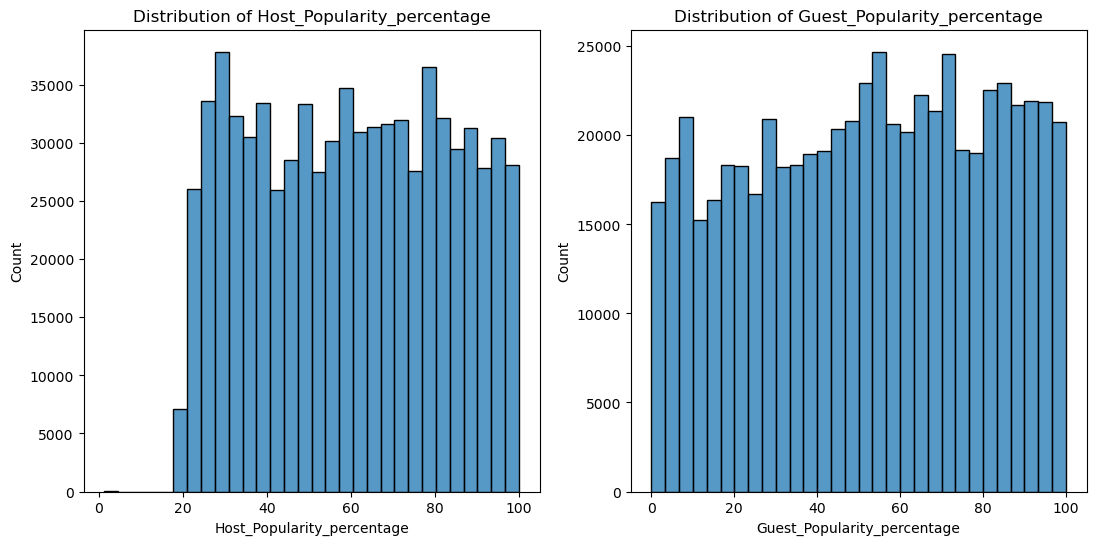

In [25]:
plt.figure(figsize=(20, 6))

# Distribution of Host_Popularity_percentage
plt.subplot(1, 3, 1)
sns.histplot(df_cleaned_dropped['Host_Popularity_percentage'], bins=30, kde=False)
plt.title('Distribution of Host_Popularity_percentage')

# Distribution of Guest_Popularity_percentage
plt.subplot(1, 3, 2)
sns.histplot(df_cleaned_dropped['Guest_Popularity_percentage'], bins=30, kde=False)
plt.title('Distribution of Guest_Popularity_percentage')

Guest popularity has a wider distribution than host. Will investigate the interactions between these two variables. 